In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
from dask import bag
from dask.diagnostics import ProgressBar

#from keras.utils import image_dataset_from_directory
#from tensorflow.keras.applications import ResNet152V2
#from tensorflow.keras.preprocessing import image
#from tensorflow.keras.applications.resnet50 import preprocess_input,decode_predictions
#from tensorflow.keras.utils import plot_model
#from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint,ReduceLROnPlateau
import tensorflow as tf
#from gradcam import get_img_array,make_gradcam_heatmap,save_and_display_gradcam

ModuleNotFoundError: No module named 'matplotlib'

In [ ]:
!pip install matplotlip
!pip install 

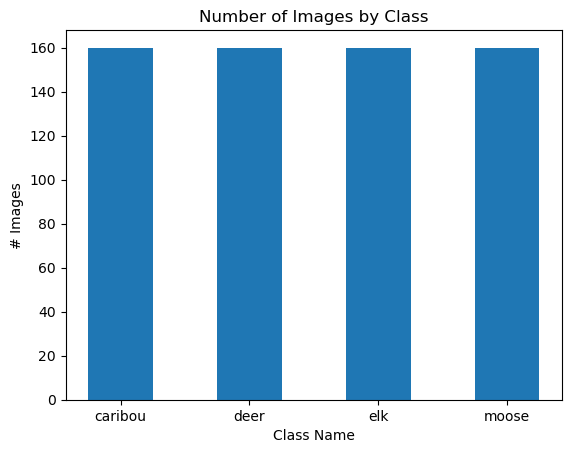

In [2]:
number_classes = {'caribou': len(os.listdir('dataset/train/caribou/')),
'deer': len(os.listdir('dataset/train/deer/')),
'elk': len(os.listdir('dataset/train/elk/')),
'moose': len(os.listdir('dataset/train/moose/'))}

plt.bar(number_classes.keys(), number_classes.values(), width = .5);
plt.title("Number of Images by Class");
plt.xlabel('Class Name');
plt.ylabel('# Images');

[########################################] | 100% Completed | 1.87 ss


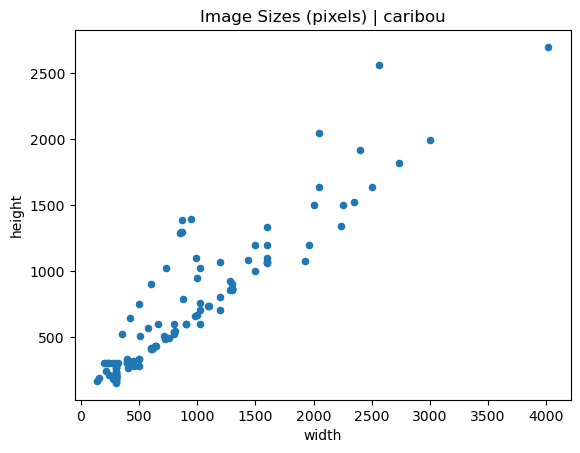

[########################################] | 100% Completed | 2.42 ss


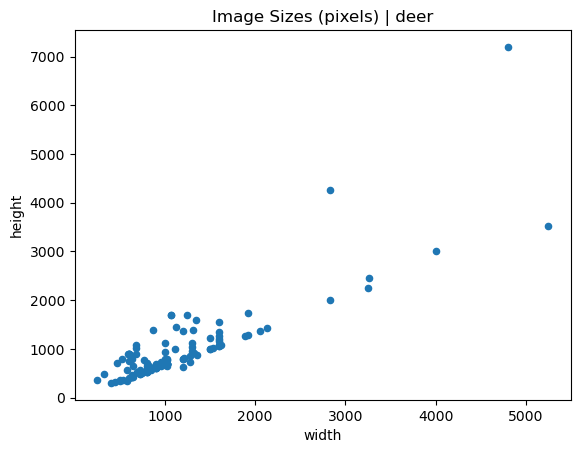

[########################################] | 100% Completed | 2.64 ss


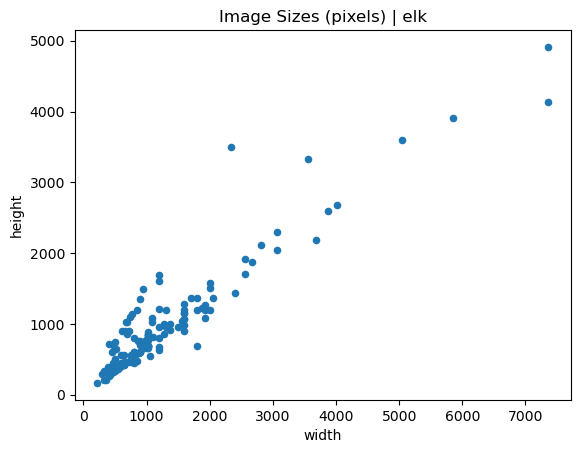

[########################################] | 100% Completed | 2.09 ss


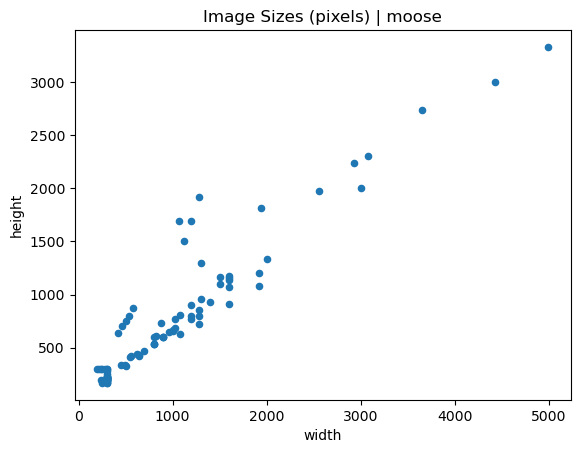

In [3]:
directories = {'caribou': 'dataset/train/caribou/',
'deer': 'dataset/train/deer/',
'elk': 'dataset/train/elk/',
'moose': 'dataset/train/moose/'}

def get_dims(file):
    im = Image.open(file)
    arr = np.array(im)
    if len(arr.shape) == 3:  # RGB image
        h, w, d = arr.shape
    elif len(arr.shape) == 2:  # Grayscale image
        h, w = arr.shape
        d = 1  # Depth is 1 for grayscale
    else:
        raise ValueError("Unexpected image dimensions: {}".format(arr.shape))
    return h, w

for n, d in directories.items():
    filepath = d
    filelist = [filepath + f for f in os.listdir(filepath)]
    dims = bag.from_sequence(filelist).map(get_dims)

    with ProgressBar():
        dims = dims.compute()
        dim_df = pd.DataFrame(dims, columns=['height', 'width'])
        sizes = dim_df.groupby(['height', 'width']).size().reset_index().rename(columns={0:'count'})
        sizes.plot.scatter(x='width', y='height')
        plt.title('Image Sizes (pixels) | {}'.format(n))
        plt.show()

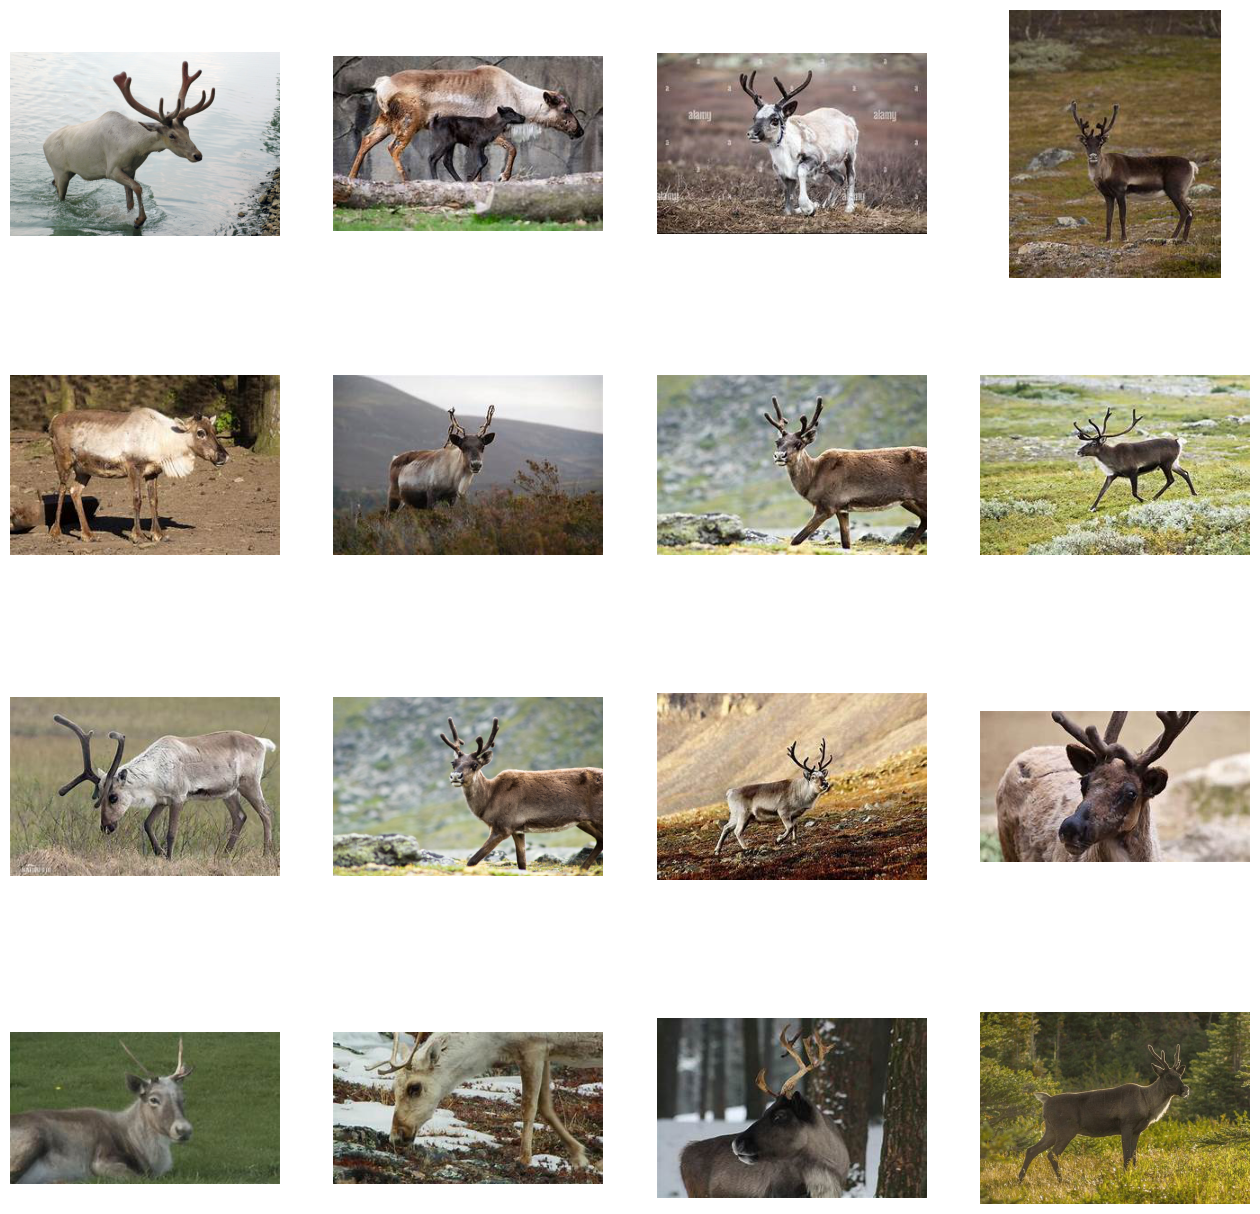

In [29]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

directories = {
    'caribou': 'dataset/train/caribou/',
    'deer': 'dataset/train/deer/',
    'elk': 'dataset/train/elk/',
    'moose': 'dataset/train/moose/'
}

# Choose one directory (e.g., 'caribou') to display images from
chosen_dir = directories['caribou']
image_files = [os.path.join(chosen_dir, fname) for fname in os.listdir(chosen_dir)]
# Ensure there are images in the directory
if not image_files:
    print(f"No images found in {chosen_dir}")
    exit()

# Show images displayed 4x4
nrows = 4
ncols = 4

def show_image_sample(pic_directory):
    # display 4x4 images
    fig = plt.gcf()
    fig.set_size_inches(ncols * 4, nrows * 4)
    for i, img_path in enumerate(pic_directory[:16]):  # Limiting to 16 images for 4x4 display
        sp = plt.subplot(nrows, ncols, i + 1)
        sp.axis('Off')
        img = mpimg.imread(img_path)
        plt.imshow(img)
    plt.show()

# Now, display images from the chosen directory
show_image_sample(image_files)

In [10]:
def get_image_type(image_path):
    """
    Determine if an image is 'grayscale' or 'rgb'.
    """
    im = Image.open(image_path)
    arr = np.array(im)
    if len(arr.shape) == 2:
        return 'grayscale'
    elif len(arr.shape) == 3 and arr.shape[2] == 3:
        return 'rgb'
    else:
        return 'other'  # Might catch cases like RGBA or other unexpected formats.

def count_image_types(directory_path):
    """
    Count the number of 'grayscale' and 'rgb' images in a directory.
    """
    grayscale_count = 0
    rgb_count = 0

    for fname in os.listdir(directory_path):
        image_path = os.path.join(directory_path, fname)
        img_type = get_image_type(image_path)
        if img_type == 'grayscale':
            grayscale_count += 1
        elif img_type == 'rgb':
            rgb_count += 1

    return grayscale_count, rgb_count

directories = {
    'caribou': 'dataset/train/caribou/',
    'deer': 'dataset/train/deer/',
    'elk': 'dataset/train/elk/',
    'moose': 'dataset/train/moose/'
}

# Loop through each directory and count image types
for animal, dir_path in directories.items():
    grayscale_count, rgb_count = count_image_types(dir_path)
    print(f"For {animal}:")
    print(f"Number of grayscale images: {grayscale_count}")
    print(f"Number of RGB images: {rgb_count}")
    print("-" * 50)


For caribou:
Number of grayscale images: 2
Number of RGB images: 158
--------------------------------------------------
For deer:
Number of grayscale images: 0
Number of RGB images: 160
--------------------------------------------------
For elk:
Number of grayscale images: 0
Number of RGB images: 160
--------------------------------------------------
For moose:
Number of grayscale images: 0
Number of RGB images: 160
--------------------------------------------------


In [14]:
def get_image_type(image_path):
    """
    Determine if an image is 'grayscale' or 'rgb'.
    """
    im = Image.open(image_path)
    arr = np.array(im)
    if len(arr.shape) == 2:
        return 'grayscale'
    elif len(arr.shape) == 3 and arr.shape[2] == 3:
        return 'rgb'
    else:
        return 'other'  # Might catch cases like RGBA or other unexpected formats.

def count_image_types_and_get_grayscale_filenames(directory_path):
    """
    Count the number of 'grayscale' and 'rgb' images in a directory and
    return filenames of 'grayscale' images.
    """
    grayscale_count = 0
    rgb_count = 0
    grayscale_filenames = []

    for fname in os.listdir(directory_path):
        image_path = os.path.join(directory_path, fname)
        img_type = get_image_type(image_path)
        if img_type == 'grayscale':
            grayscale_count += 1
            grayscale_filenames.append(fname)
        elif img_type == 'rgb':
            rgb_count += 1

    return grayscale_count, rgb_count, grayscale_filenames

# Loop through each directory and count image types
for animal, dir_path in directories.items():
    grayscale_count, rgb_count, grayscale_files = count_image_types_and_get_grayscale_filenames(dir_path)
    print(f"For {animal}:")
    print(f"Number of grayscale images: {grayscale_count}")
    print(f"Number of RGB images: {rgb_count}")
    print(f"Filenames of grayscale images: {grayscale_files}")
    print("-" * 50)


For caribou:
Number of grayscale images: 2
Number of RGB images: 158
Filenames of grayscale images: ['Female_Caribou26.png', 'Male_Caribou54.png']
--------------------------------------------------
For deer:
Number of grayscale images: 0
Number of RGB images: 160
Filenames of grayscale images: []
--------------------------------------------------
For elk:
Number of grayscale images: 0
Number of RGB images: 160
Filenames of grayscale images: []
--------------------------------------------------
For moose:
Number of grayscale images: 0
Number of RGB images: 160
Filenames of grayscale images: []
--------------------------------------------------


In [39]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=15,       # Random rotations within 15 degrees
    width_shift_range=0.1,  # Random horizontal shift
    height_shift_range=0.1, # Random vertical shift
    shear_range=0.1,        # Shear intensity
    zoom_range=0.1,         # Random zoom
    horizontal_flip=True,   # Horizontal flip
    brightness_range=[0.8, 1.2], # Vary brightness between 80% to 120%
    fill_mode='nearest'     # Fill missing pixels with the nearest filled value
)

TypeError: Unable to convert function return value to a Python type! The signature was
	() -> handle

In [48]:
import tensorflow as tf

# Set fixed seeding values for reproducability during experiments
# Skip this cell if random initialization (with varied results) is needed
np.random.seed(1234)
tf.random.set_seed(5678)

PATH = 'dataset/train/'

train_ds = image_dataset_from_directory(
  PATH,
  validation_split=0.1,
  subset="training",
  seed=123,
  image_size=(224, 224))

print(train_ds.class_names)

TypeError: Descriptors cannot not be created directly.
If this call came from a _pb2.py file, your generated code is out of date and must be regenerated with protoc >= 3.19.0.
If you cannot immediately regenerate your protos, some other possible workarounds are:
 1. Downgrade the protobuf package to 3.20.x or lower.
 2. Set PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION=python (but this will use pure-Python parsing and will be much slower).

More information: https://developers.google.com/protocol-buffers/docs/news/2022-05-06#python-updates

In [1]:
import tensorflow

In [55]:
import tensorflow as tf

TypeError: Descriptors cannot not be created directly.
If this call came from a _pb2.py file, your generated code is out of date and must be regenerated with protoc >= 3.19.0.
If you cannot immediately regenerate your protos, some other possible workarounds are:
 1. Downgrade the protobuf package to 3.20.x or lower.
 2. Set PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION=python (but this will use pure-Python parsing and will be much slower).

More information: https://developers.google.com/protocol-buffers/docs/news/2022-05-06#python-updates